# Final Assignment - Re-running model from Assignment 2

Variables:  
        "nomem_encr",  # ID variable required for predictions,  
        "birthyear_bg",  
        "age_bg",  
        "cf20m130", # Within how many years do you hope to have your first/next child?  
        "cf20m128", # Do you think you will have children in the future?  
        "cf20m129", # How many children do you think you'll have?  
        "cf20m031" # What year did you marry?  



## Logistic Regression Model using Intention Items

This is the model submitted to PreFer. Re-running it here to get accuracy metrics.

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve
import random

In [24]:


# import data
main_data = pd.read_csv('training_data/PreFer_train_data.csv') 
# find demographic variables in codebook
# display(background_data[background_var_names].drop_duplicates()) # lots of duplicates and multiple entries due to income over waves



# merge_data = background_data[background_var_names[:-2]].drop_duplicates()
# # fix NaNs on migration; for simplicity, let's recode to Dutch or not Dutch
# # "c(`Dutch background` = 0, `First generation foreign, Western background` = 101, `First generation foreign, non-western background` = 102, `Second generation foreign, Western background` = 201, `Second generation foreign, non-western background` = 202, `Origin unknown or part of the information unknown (missing values)` = 999)",1
# merge_data['migration_background_imp'] = np.where(merge_data['migration_background_imp'] > 0, 1, 0) # recode migration data
# display(merge_data)

# # merge data, this has only one row per unique ID
# df = pd.merge(merge_data, grouped_data, on='nomem_encr')
# display(df)
# print(df.isna().sum()) # no NaNs




/var/folders/99/w8jtz3l97r9f018pcnl678l80000gp/T/ipykernel_52785/147139787.py:2: DtypeWarning: Columns (2583,2584,2585,2586,2587,2588,2589,4358,4359,4360,4361,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371,4372,4373,4374,4375,4379,4380,4381,4382,4383,4384,4385,4386,4387,4388,4389,4390,4391,4392,4393,4394,4395,4396,4397,4398,4399,4400,4401,4405,4406,4407,4408,4409,5215,5216,5219,5220,5613,5614,5615,5616,5617,5618,5619,5620,5621,5622,5624,5625,5626,5627,5628,5629,5630,5631,5632,5633,5634,5635,5636,5638,5639,5640,5787,5788,5789,5790,5791,5792,5793,5794,5795,5796,6393,6394,6395,6396,6397,6398,6399,6400,6401,6402,6403,6619,6620,6621,6622,6623,6624,6625,6626,6627,6628,6629,6630,6631,6632,6633,6634,6635,6638,6640,6641,6642,6643,6644,6645,6646,6647,6648,6649,6650,6651,6652,6653,6654,6655,6656,6657,6658,6659,6660,6661,6664,6666,6667,6668,6669,6670,6965,6966,6967,6968,6969,6970,6971,6972,6973,6974,6975,7064,7065,7066,7067,7068,7069,7070,7071,7072,7073,7074,7163,7164,7165,7166,7167,7168,7169,7

In [25]:
# get list of var_names
var_names = [
    "nomem_encr",  # ID variable required for predictions,
    "birthyear_bg",
    "age_bg",
    "cf20m130", # Within how many years do you hope to have your first/next child?
    "cf20m128", # Do you think you will have children in the future?
    "cf20m129", # How many children do you think you'll have?
    "cf20m031", # What year did you marry?
    # "nomem_encr",  # ID variable required for predictions,
    # "cf19l130", # Within how many years do you hope to have your first/next child?
    # "cf19l128", # Do you think you will have children in the future?
    # "cf19l129", # How many children do you think you'll have?
    # "cf19l031" # What year did you marry?
]

# take mean of income and median education across waves (grouped by unique IDs)
df = main_data[var_names]

display(df.head())

,nomem_encr,birthyear_bg,age_bg,cf20m130,cf20m128,cf20m129,cf20m031
0,712619,1991,29.0,NaN,NaN,NaN,NaN
1,706448,1975,45.0,NaN,NaN,NaN,NaN
2,729145,1975,45.0,NaN,2.0,NaN,NaN
3,729424,1985,35.0,NaN,NaN,NaN,NaN
4,715619,1990,30.0,NaN,3.0,NaN,2018.0


In [26]:


# get IDs that have outcome data
have_outcome = main_data[main_data['outcome_available'] == 1]['nomem_encr']
display(have_outcome.head())

4     715619
8     716711
18    717188
19    712090
35    709537
Name: nomem_encr, dtype: int64

In [27]:
# now we have just df of those who have outcome data
subset_df = df[df['nomem_encr'].isin(have_outcome)]

In [28]:
display(subset_df.head())

print(subset_df.isna().sum())
subset_df = subset_df.fillna(0)


,nomem_encr,birthyear_bg,age_bg,cf20m130,cf20m128,cf20m129,cf20m031
4,715619,1990,30.0,NaN,3.0,NaN,2018.0
8,716711,1989,31.0,1.0,1.0,1.0,NaN
18,717188,1983,38.0,NaN,3.0,NaN,NaN
19,712090,1981,39.0,NaN,2.0,NaN,2018.0
35,709537,1985,35.0,NaN,3.0,NaN,NaN


nomem_encr        0
birthyear_bg      0
age_bg            0
cf20m130        623
cf20m128         79
cf20m129        623
cf20m031        686
dtype: int64


In [19]:
# ready to train lr baseline model
# get outcome data
outcome_data = pd.read_csv('training_data/PreFer_train_outcome.csv')

# set X, y for the model training function
model_df = pd.merge(subset_df, outcome_data[outcome_data['nomem_encr'].isin(have_outcome)], on="nomem_encr")
X = model_df.drop(['new_child', 'nomem_encr'], axis=1)
y = model_df['new_child']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

Precision: 0.802
Recall: 0.813
F Score: 0.781


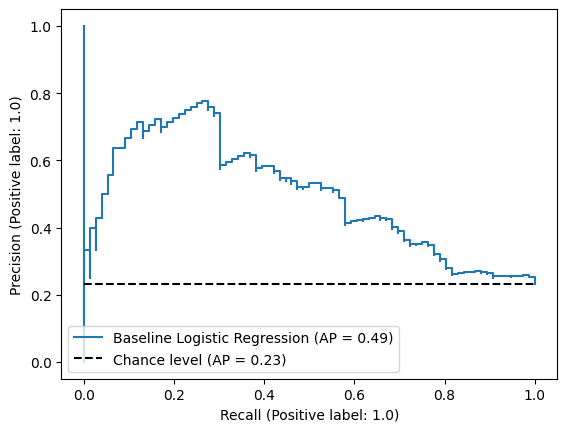

In [20]:
###########################################
# Logistic Regression Baseline Model
###########################################

"""
Baseline model 1 using logistic regression of 5 background variables:
    year of birth
    gender
    origin (recoded as binary Dutch or not Dutch)
    education
    median gross household income across waves

Split train/test at test size = 0.33; chance level = 0.23 (unbalanced)

Results: Baseline model does better than chance
"""


model_baseline_lr = LogisticRegression()

# Fit the model
model_baseline_lr.fit(X_train, y_train)

y_pred = model_baseline_lr.predict(X_test)

precision, recall, f_score, support = precision_recall_fscore_support(
    y_test, y_pred,
    average='weighted')

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F Score: {f_score:.3f}")

from sklearn import metrics
metrics.PrecisionRecallDisplay.from_estimator(
    model_baseline_lr, X_test, y_test, 
    name="Baseline Logistic Regression", 
    plot_chance_level=True)



In [22]:
accuracy = model_baseline_lr.score(X_test, y_test)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.813
